# **Installation et import package**

In [ ]:
pip install numpy pandas scikit-learn

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
import re
import warnings
import os
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import shap


#   **Importation fichier**

In [ ]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

In [ ]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [ ]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

*Filtrer data en fonction des variables pertinentes lié au projet*

In [ ]:
# Les variables choisi
variables = [
    "BuildingType",
    "PrimaryPropertyType",
    'CouncilDistrictCode',
    "Address",
    "ZipCode",
    "Neighborhood",
    "Latitude",
    "Longitude",
    "YearBuilt",
    "NumberofBuildings",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "NumberofFloors",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseType",
    "LargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    "SiteEUI(kBtu/sf)",
    "DefaultData",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUse(kBtu)",
    "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kWh)",
    "Electricity(kBtu)",
    "NaturalGas(therms)",
    "ComplianceStatus",
    "TotalGHGEmissions",
    "GHGEmissionsIntensity",
    	"Outlier",
]

# Filtrer le DataFrame pour ne conserver que les variables pertinentes
data_pertinent = data[variables]

# Afficher les premières lignes du DataFrame filtré pour vérifier
data_pertinent

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),DefaultData,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Outlier
0,NonResidential,Hotel,7,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,88434,0,12,88434,Hotel,88434.0,60.0,81.699997,False,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,Compliant,249.98,2.83,NaN
1,NonResidential,Hotel,7,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,103566,15064,11,88502,Hotel,83880.0,61.0,94.800003,False,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,Compliant,295.86,2.86,NaN
2,NonResidential,Hotel,7,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,956110,196718,41,759392,Hotel,756493.0,43.0,96.000000,False,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,Compliant,2089.28,2.19,NaN
3,NonResidential,Hotel,7,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,61320,0,10,61320,Hotel,61320.0,56.0,110.800003,False,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,Compliant,286.43,4.67,NaN
4,NonResidential,Hotel,7,401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,175580,62000,18,113580,Hotel,123445.0,75.0,114.800003,False,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,Compliant,505.01,2.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,2,1600 S Dakota St,NaN,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,12294,0,1,12294,Office,12294.0,46.0,69.099998,True,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,Error - Correct Default Data,20.94,1.70,NaN
3372,Nonresidential COS,Other,2,719 8th Ave S,NaN,DOWNTOWN,47.59625,-122.32283,2004,1.0,16000,0,1,16000,Other - Recreation,16000.0,NaN,59.400002,False,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,Compliant,32.17,2.01,NaN
3373,Nonresidential COS,Other,7,1920 1st Ave W,NaN,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,13157,0,1,13157,Other - Recreation,7583.0,NaN,438.200012,False,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,Compliant,223.54,16.99,NaN
3374,Nonresidential COS,Mixed Use Property,1,8319 8th Ave S,NaN,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,14101,0,1,14101,Other - Recreation,6601.0,NaN,51.000000,False,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,Compliant,22.11,1.57,NaN


*filtrer data_pertinent en fonction des logement non residentiel **(NonResidential)** dans la variable BuildingType*

In [ ]:
data_pertinent["BuildingType"].value_counts()

,count
BuildingType,
NonResidential,1460
Multifamily LR (1-4),1018
Multifamily MR (5-9),580
Multifamily HR (10+),110
SPS-District K-12,98
Nonresidential COS,85
Campus,24
Nonresidential WA,1


In [ ]:
# Filtrage des données où BuildingType est NonResidential
data_pertinent = data_pertinent[data_pertinent['BuildingType'] == 'NonResidential']

In [ ]:
data_pertinent

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),DefaultData,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Outlier
0,NonResidential,Hotel,7,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,88434,0,12,88434,Hotel,88434.0,60.0,81.699997,False,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,Compliant,249.98,2.83,NaN
1,NonResidential,Hotel,7,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,103566,15064,11,88502,Hotel,83880.0,61.0,94.800003,False,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,Compliant,295.86,2.86,NaN
2,NonResidential,Hotel,7,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,956110,196718,41,759392,Hotel,756493.0,43.0,96.000000,False,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,Compliant,2089.28,2.19,NaN
3,NonResidential,Hotel,7,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,61320,0,10,61320,Hotel,61320.0,56.0,110.800003,False,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,Compliant,286.43,4.67,NaN
4,NonResidential,Hotel,7,401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,175580,62000,18,113580,Hotel,123445.0,75.0,114.800003,False,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,Compliant,505.01,2.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,NonResidential,Warehouse,2,6518 Ellis,98108.0,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,52085,4222,1,47863,Non-Refrigerated Warehouse,52085.0,37.0,69.199997,False,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,Compliant,157.70,3.03,NaN
3339,NonResidential,Small- and Mid-Sized Office,2,7277 Perimeter Rd.,98108.0,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,24990,0,2,24990,Office,24990.0,9.0,176.899994,False,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,Compliant,134.80,5.39,NaN
3340,NonResidential,Other,4,7135 Sportsfield Drive NE,98155.0,NORTHEAST,47.68109,-122.26180,2013,1.0,72000,0,1,72000,Other - Recreation,72000.0,NaN,40.599998,False,44.400002,97.900002,101.800003,2925780.00,3.198858e+06,0.00,5.573329e+05,1901620.0,10241.59961,Compliant,67.65,0.94,NaN
3347,NonResidential,K-12 School,3,1701 20th Ave South,98144.0,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,45000,0,3,45000,K-12 School,45728.0,77.0,29.000000,False,30.600000,91.099998,96.000000,1325972.75,1.397742e+06,0.00,3.886204e+05,1325973.0,0.00000,Compliant,9.24,0.21,NaN


*suprimer les ligne ou la cible SiteEUI(kBtu/sf) est NaN*

In [ ]:
data_pertinent = data_pertinent.dropna(subset=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)'])


*Traittement des outliers

In [ ]:
# Supprimer les lignes où 'Outlier' est égal à 'Low outlier' ou 'High outlier'
data_pertinent = data_pertinent[(data_pertinent['Outlier'] != 'Low outlier') & (data_pertinent['Outlier'] != 'High outlier')]

*Suprimer les NaN*

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_pertinent.isnull().mean() * 100
print(missing_values)

BuildingType                   0.000000
PrimaryPropertyType            0.000000
CouncilDistrictCode            0.000000
Address                        0.000000
ZipCode                        0.000000
Neighborhood                   0.000000
Latitude                       0.000000
Longitude                      0.000000
YearBuilt                      0.000000
NumberofBuildings              0.000000
PropertyGFATotal               0.000000
PropertyGFAParking             0.000000
NumberofFloors                 0.000000
PropertyGFABuilding(s)         0.000000
LargestPropertyUseType         0.277585
LargestPropertyUseTypeGFA      0.277585
ENERGYSTARScore               31.714087
SiteEUI(kBtu/sf)               0.000000
DefaultData                    0.000000
SiteEUIWN(kBtu/sf)             0.000000
SourceEUI(kBtu/sf)             0.000000
SourceEUIWN(kBtu/sf)           0.000000
SiteEnergyUse(kBtu)            0.000000
SiteEnergyUseWN(kBtu)          0.000000
SteamUse(kBtu)                 0.000000


In [ ]:
data_pertinent = data_pertinent.dropna(subset=['NumberofBuildings', 'TotalGHGEmissions', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA'])


#  MODELE DE PREDICTION

*Ajout de la colonne 'TotalSurface*

In [ ]:
# Ajout de la colonne 'TotalSurface'
data_pertinent['TotalSurface'] = data_pertinent['NumberofFloors'] * data_pertinent['PropertyGFATotal']

# Affichage des premières lignes pour vérifier
display(data_pertinent.head())

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),DefaultData,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Outlier,TotalSurface
0,NonResidential,Hotel,7,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,88434,0,12,88434,Hotel,88434.0,60.0,81.699997,False,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,Compliant,249.98,2.83,NaN,1061208
1,NonResidential,Hotel,7,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,103566,15064,11,88502,Hotel,83880.0,61.0,94.800003,False,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,Compliant,295.86,2.86,NaN,1139226
2,NonResidential,Hotel,7,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,956110,196718,41,759392,Hotel,756493.0,43.0,96.000000,False,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,Compliant,2089.28,2.19,NaN,39200510
3,NonResidential,Hotel,7,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,61320,0,10,61320,Hotel,61320.0,56.0,110.800003,False,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,Compliant,286.43,4.67,NaN,613200
4,NonResidential,Hotel,7,401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,175580,62000,18,113580,Hotel,123445.0,75.0,114.800003,False,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,Compliant,505.01,2.88,NaN,3160440


# **Est ce que ENERGYSTARScore est important ou pas**

*Il est souvent manquant, on va creer un nouveau jeux de donné  qui sera reduit ou on suprimera toutes les lignes ou ENERGYSTARScore est manquant, sur ce je de donné reduit on va relancer tout les model. on fera une fois avec ENERGYSTARScore et une fois sans ENERGYSTARScore et a ce moment on regardera quel est le meilleur model?*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Les variables quantitatives et catégorielles basées sur les colonnes disponibles
numeric_ener = [
    'YearBuilt',
    'NumberofBuildings',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'TotalSurface',
    'ENERGYSTARScore',
]

vari_categorielles_ener = [
    'BuildingType',
    'PrimaryPropertyType',
    'Neighborhood',
    'LargestPropertyUseType',
]

quanti_quali_ener = numeric_ener + vari_categorielles_ener

# Filtrer le DataFrame pour ne conserver que les variables pertinentes
data_avec_energystar = data_pertinent[quanti_quali_ener]
data_avec_energystar

,YearBuilt,NumberofBuildings,PropertyGFATotal,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,TotalSurface,ENERGYSTARScore,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
0,1927,1.0,88434,12,88434,88434.0,1061208,60.0,NonResidential,Hotel,DOWNTOWN,Hotel
1,1996,1.0,103566,11,88502,83880.0,1139226,61.0,NonResidential,Hotel,DOWNTOWN,Hotel
2,1969,1.0,956110,41,759392,756493.0,39200510,43.0,NonResidential,Hotel,DOWNTOWN,Hotel
3,1926,1.0,61320,10,61320,61320.0,613200,56.0,NonResidential,Hotel,DOWNTOWN,Hotel
4,1980,1.0,175580,18,113580,123445.0,3160440,75.0,NonResidential,Hotel,DOWNTOWN,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...
3338,1955,1.0,52085,1,47863,52085.0,52085,37.0,NonResidential,Warehouse,GREATER DUWAMISH,Non-Refrigerated Warehouse
3339,1929,1.0,24990,2,24990,24990.0,49980,9.0,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,Office
3340,2013,1.0,72000,1,72000,72000.0,72000,NaN,NonResidential,Other,NORTHEAST,Other - Recreation
3347,2015,1.0,45000,3,45000,45728.0,135000,77.0,NonResidential,K-12 School,GREATER DUWAMISH,K-12 School


*Suprimer les lignes dont ENERGYSTARScore est NaN*

In [ ]:
# Filtrer le DataFrame pour ne conserver que les lignes où ENERGYSTARScore n'est pas NaN
data_avec_energystar_reduit = data_avec_energystar.dropna(subset=['ENERGYSTARScore'])

In [ ]:
data_avec_energystar_reduit

,YearBuilt,NumberofBuildings,PropertyGFATotal,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,TotalSurface,ENERGYSTARScore,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
0,1927,1.0,88434,12,88434,88434.0,1061208,60.0,NonResidential,Hotel,DOWNTOWN,Hotel
1,1996,1.0,103566,11,88502,83880.0,1139226,61.0,NonResidential,Hotel,DOWNTOWN,Hotel
2,1969,1.0,956110,41,759392,756493.0,39200510,43.0,NonResidential,Hotel,DOWNTOWN,Hotel
3,1926,1.0,61320,10,61320,61320.0,613200,56.0,NonResidential,Hotel,DOWNTOWN,Hotel
4,1980,1.0,175580,18,113580,123445.0,3160440,75.0,NonResidential,Hotel,DOWNTOWN,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...
3324,2015,1.0,483397,12,317189,342173.0,5800764,98.0,NonResidential,Large Office,LAKE UNION,Office
3337,2014,1.0,126823,4,85284,88157.0,507292,72.0,NonResidential,Hotel,LAKE UNION,Hotel
3338,1955,1.0,52085,1,47863,52085.0,52085,37.0,NonResidential,Warehouse,GREATER DUWAMISH,Non-Refrigerated Warehouse
3339,1929,1.0,24990,2,24990,24990.0,49980,9.0,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,Office


In [ ]:
# Ajouter la colonne 'TotalGHGEmissions' aux données filtrées
data_avec_energystar_reduit = data_avec_energystar_reduit.join(data_pertinent[['TotalGHGEmissions']])

In [ ]:
# Renommer la colonne cible
data_avec_energystar_reduit = data_avec_energystar_reduit.rename(columns={"TotalGHGEmissions": "target"})

In [ ]:
x_avec_energystar = data_avec_energystar_reduit.drop(columns="target")
y_avec_energystar = data_avec_energystar_reduit.target

In [ ]:

from sklearn.model_selection import GridSearchCV, train_test_split
# Diviser les données en ensembles d'entraînement et de test
x_train_avec, x_test_avec, y_train_avec, y_test_avec = train_test_split(x_avec_energystar, y_avec_energystar, test_size=0.2, random_state=42)

**Entraîner le modèle SVM avec ENERGYSTARScore**

In [ ]:
# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric_ener),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles_ener)
    ]
)

# Créer le pipeline avec le prétraitement et le modèle SVR
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ]
)

# Définir les paramètres pour la recherche
paramètres = {
    'regressor__C': [0.1, 1, 10, 100, 1000, 10000],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'rbf']
}

# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train_avec, y_train_avec)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', SVR())]),
             n_jobs=-1,
             param_grid={'regressor__C': [0.1, 1, 10, 100, 1000, 10000],
                         'regressor__epsilon': [0.1, 0.2, 0.5],
                         'regressor__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_svm_avec_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_svm_avec_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__C,param_regressor__epsilon,param_regressor__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
35,0.603426,0.046939,0.026281,0.001734,10000,0.5,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.633810,0.900411,0.881567,0.805263,0.121479,1,0.995156,0.971107,0.977809,0.981357,0.010134
33,0.583317,0.023331,0.025494,0.001240,10000,0.2,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.633842,0.900344,0.881545,0.805244,0.121442,2,0.995150,0.971089,0.977768,0.981336,0.010141
31,0.574813,0.007447,0.025061,0.000051,10000,0.1,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.633853,0.900321,0.881538,0.805237,0.121430,3,0.995148,0.971084,0.977754,0.981328,0.010144
28,2.879857,1.444432,0.023151,0.005993,1000,0.5,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.772440,0.643186,0.632927,0.682851,0.063487,4,0.608962,0.719209,0.734602,0.687591,0.055953
26,4.531128,2.349302,0.031694,0.008761,1000,0.2,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.772223,0.643120,0.632878,0.682740,0.063412,5,0.608671,0.719233,0.734634,0.687513,0.056103
24,6.338217,0.779541,0.041202,0.015506,1000,0.1,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.772173,0.643126,0.632863,0.682721,0.063391,6,0.608532,0.719239,0.734622,0.687464,0.056166
30,25.958884,4.285596,0.018415,0.000790,10000,0.1,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.477671,0.755879,0.753268,0.662273,0.130538,7,0.935476,0.805757,0.812210,0.851147,0.059687
34,15.832115,7.812027,0.015913,0.002807,10000,0.5,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.477430,0.755883,0.753392,0.662235,0.130681,8,0.935524,0.805681,0.812420,0.851208,0.059684
32,22.028388,16.314973,0.017567,0.000118,10000,0.2,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.477511,0.755855,0.753317,0.662227,0.130618,9,0.935437,0.805733,0.812309,0.851160,0.059653
29,0.188192,0.019636,0.024395,0.000497,1000,0.5,rbf,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.296682,0.406437,0.358546,0.353888,0.044928,10,0.363255,0.445023,0.483335,0.430538,0.050081


*tableau des 3 meilleur avec energystarcor*

In [ ]:
meilleurs_svm_avec_energy = resultat_svm_avec_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_svm_avec_energy

,mean_test_score,mean_train_score
35,0.805263,0.981357
33,0.805244,0.981336
31,0.805237,0.981328


**Entraîner le modèle SVM sans ENERGYSTARScore**

*Nous le meme model avec data_avec_energystar_reduit mais cette fois si sans la colonne EnergyStarcore*

In [ ]:
# 1. Filtrer les lignes où ENERGYSTARScore est NaN
data_filtrée = data_pertinent.dropna(subset=['ENERGYSTARScore'])

# 2. Supprimer la colonne ENERGYSTARScore des données filtrées
data_sans_energystar = data_filtrée.drop(columns=['ENERGYSTARScore'])

# 3. Séparer les variables explicatives (features) et la variable cible (target)
x_sans_energystar = data_sans_energystar.drop(columns='TotalGHGEmissions')
y_sans_energystar = data_sans_energystar['TotalGHGEmissions']

# 4. Diviser les données en ensembles d'entraînement et de test
x_train_sans, x_test_sans, y_train_sans, y_test_sans = train_test_split(
    x_sans_energystar, y_sans_energystar, test_size=0.2, random_state=42
)

# Liste des colonnes numériques et catégorielles disponibles
colonnes_numeriques = [
    'YearBuilt',
    'NumberofBuildings',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'TotalSurface'
]

colonnes_categorielles = [
    'BuildingType',
    'PrimaryPropertyType',
    'Neighborhood',
    'LargestPropertyUseType'
]

# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), colonnes_numeriques),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colonnes_categorielles)
    ]
)



# Créer le pipeline avec le prétraitement et le modèle SVR
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ]
)

# Définir les paramètres pour la recherche
paramètres = {
    'regressor__C': [0.1, 1, 10, 100, 1000, 10000],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'rbf']
}

# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True, error_score='raise'
)

# Entraîner le modèle
grid.fit(x_train_sans, y_train_sans)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', SVR())]),
             n_jobs=-1,
             param_grid={'regressor__C': [0.1, 1, 10, 100, 1000, 10000],
                         'regressor__epsilon': [0.1, 0.2, 0.5],
                         'regressor__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_svm_sans_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_svm_sans_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__C,param_regressor__epsilon,param_regressor__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
31,0.819277,0.333753,0.034446,0.009070,10000,0.1,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.639318,0.910031,0.916593,0.821981,0.129190,1,0.992308,0.972753,0.978284,0.981115,0.008230
33,1.371805,0.289697,0.041047,0.012524,10000,0.2,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.639253,0.910029,0.916600,0.821961,0.129222,2,0.992308,0.972755,0.978299,0.981121,0.008228
35,0.511554,0.102966,0.021608,0.005477,10000,0.5,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.639037,0.910044,0.916613,0.821898,0.129330,3,0.992307,0.972765,0.978337,0.981136,0.008220
26,2.074125,1.568838,0.017146,0.000069,1000,0.2,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.766071,0.634836,0.630618,0.677175,0.062883,4,0.601945,0.714104,0.730941,0.682330,0.057255
24,1.142583,0.256307,0.016994,0.000515,1000,0.1,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.766108,0.634782,0.630594,0.677161,0.062918,5,0.601965,0.714082,0.730934,0.682327,0.057239
28,1.512642,0.701427,0.017153,0.000338,1000,0.5,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.765891,0.634725,0.630764,0.677127,0.062787,6,0.601638,0.713955,0.731030,0.682208,0.057396
30,13.803747,3.049283,0.019772,0.001793,10000,0.1,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.469056,0.749571,0.752987,0.657205,0.133048,7,0.934882,0.801973,0.809834,0.848896,0.060886
32,10.421225,2.866776,0.028054,0.010898,10000,0.2,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.468866,0.749577,0.752996,0.657146,0.133142,8,0.934904,0.802005,0.809851,0.848920,0.060884
34,16.103468,6.471047,0.017040,0.000510,10000,0.5,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.468614,0.749501,0.753278,0.657131,0.133311,9,0.934907,0.802052,0.810157,0.849038,0.060808
29,0.166268,0.014449,0.023949,0.000302,1000,0.5,rbf,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.297590,0.414693,0.374991,0.362425,0.048626,10,0.369185,0.457965,0.480113,0.435754,0.047932


*tableau des 3 meilleur sans energystarcor*

In [ ]:
meilleurs_svm_sans_energy = resultat_svm_sans_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_svm_sans_energy

,mean_test_score,mean_train_score
31,0.821981,0.981115
33,0.821961,0.981121
35,0.821898,0.981136


**Entraîner le modèle RandomForestRegressor avec ENERGYSTARScore**

In [ ]:


# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric_ener),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles_ener)
    ]
)

# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]
)

 #Définir les paramètres pour la recherche
paramètres = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train_avec, y_train_avec)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_forest_avec_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_forest_avec_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
83,6.084878,0.775870,0.070454,0.026960,30,1,2,300,"{'regressor__max_depth': 30, 'regressor__min_s...",0.882863,0.923013,0.876648,0.894175,0.020549,1,0.953787,0.970915,0.978790,0.967831,0.010438
2,5.313049,0.960925,0.061706,0.017032,None,1,2,300,"{'regressor__max_depth': None, 'regressor__min...",0.883246,0.912217,0.883336,0.892933,0.013636,2,0.957164,0.973300,0.976675,0.969046,0.008514
54,1.500272,0.017161,0.024533,0.000329,20,1,2,100,"{'regressor__max_depth': 20, 'regressor__min_s...",0.869422,0.909601,0.897864,0.892296,0.016869,3,0.960063,0.967047,0.980276,0.969129,0.008382
28,2.517764,0.528516,0.046495,0.013605,10,1,2,200,"{'regressor__max_depth': 10, 'regressor__min_s...",0.878375,0.919448,0.871428,0.889751,0.021190,4,0.948184,0.971600,0.969678,0.963154,0.010614
0,2.682244,0.158964,0.038344,0.006169,None,1,2,100,"{'regressor__max_depth': None, 'regressor__min...",0.877413,0.907052,0.883387,0.889284,0.012799,5,0.960024,0.965506,0.978044,0.967858,0.007543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0.732276,0.025526,0.024389,0.003190,10,4,10,100,"{'regressor__max_depth': 10, 'regressor__min_s...",0.462957,0.597013,0.560575,0.540182,0.056596,104,0.530368,0.667742,0.745970,0.648027,0.089116
107,2.981101,0.347293,0.057929,0.016154,30,4,10,300,"{'regressor__max_depth': 30, 'regressor__min_s...",0.487946,0.572438,0.559572,0.539985,0.037170,105,0.499397,0.651607,0.735912,0.628972,0.097874
106,1.672068,0.010777,0.031671,0.000062,30,4,10,200,"{'regressor__max_depth': 30, 'regressor__min_s...",0.491049,0.580937,0.544994,0.538993,0.036941,106,0.521215,0.664422,0.723440,0.636359,0.084909
78,0.856071,0.029065,0.021822,0.001035,20,4,10,100,"{'regressor__max_depth': 20, 'regressor__min_s...",0.484551,0.606388,0.524264,0.538401,0.050734,107,0.522293,0.689795,0.710348,0.640812,0.084225


### *tableau des 3 meilleur random avec energystarcor*

In [ ]:
meilleurs_forest_avec_energy = resultat_forest_avec_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_forest_avec_energy

,mean_test_score,mean_train_score
83,0.894175,0.967831
2,0.892933,0.969046
54,0.892296,0.969129


**Entraîner le modèle RandomForestRegressor sans ENERGYSTARScore**

In [ ]:

# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), colonnes_numeriques),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colonnes_categorielles)
    ]
)

# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]
)

 #Définir les paramètres pour la recherche
paramètres = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True, error_score='raise'
)

# Entraîner le modèle
grid.fit(x_train_sans, y_train_sans)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_forest_san_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_forest_san_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.527233,0.049491,0.024806,0.000866,None,1,2,100,"{'regressor__max_depth': None, 'regressor__min...",0.866056,0.911106,0.899456,0.892206,0.019093,1,0.939564,0.970577,0.976875,0.962338,0.016308
56,4.441704,0.485012,0.062631,0.004757,20,1,2,300,"{'regressor__max_depth': 20, 'regressor__min_s...",0.858242,0.916887,0.901091,0.892074,0.024776,2,0.951209,0.972839,0.977243,0.967097,0.011377
55,2.673950,0.054052,0.037828,0.002811,20,1,2,200,"{'regressor__max_depth': 20, 'regressor__min_s...",0.864052,0.918458,0.893011,0.891841,0.022227,3,0.943798,0.971158,0.971160,0.962039,0.012898
82,2.882645,0.027864,0.039227,0.001589,30,1,2,200,"{'regressor__max_depth': 30, 'regressor__min_s...",0.864599,0.916845,0.892027,0.891157,0.021338,4,0.933198,0.969361,0.977329,0.959963,0.019203
28,1.871156,0.443064,0.055017,0.017239,10,1,2,200,"{'regressor__max_depth': 10, 'regressor__min_s...",0.862296,0.905704,0.905066,0.891022,0.020314,5,0.946381,0.966034,0.976960,0.963125,0.012652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1.539280,0.028349,0.036130,0.007204,None,4,10,200,"{'regressor__max_depth': None, 'regressor__min...",0.456773,0.598121,0.530787,0.528560,0.057727,104,0.538062,0.674988,0.703823,0.638958,0.072309
51,0.683868,0.031172,0.021926,0.001001,10,4,10,100,"{'regressor__max_depth': 10, 'regressor__min_s...",0.466284,0.606265,0.511552,0.528034,0.058323,105,0.511852,0.683729,0.687574,0.627718,0.081945
53,2.919079,0.574203,0.064153,0.008827,10,4,10,300,"{'regressor__max_depth': 10, 'regressor__min_s...",0.458550,0.583165,0.532736,0.524817,0.051181,106,0.514080,0.658679,0.714516,0.629092,0.084460
99,0.862788,0.025788,0.022970,0.000872,30,4,2,100,"{'regressor__max_depth': 30, 'regressor__min_s...",0.431413,0.573269,0.564146,0.522942,0.064828,107,0.498430,0.669133,0.735399,0.634321,0.099825


### *tableau des 3 meilleur random avec energystarcor*

In [ ]:
meilleurs_forest_san_energy = resultat_forest_san_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_forest_san_energy

,mean_test_score,mean_train_score
0,0.892206,0.962338
56,0.892074,0.967097
55,0.891841,0.962039


**Entraîner le modèle gradient avec ENERGYSTARScore**

In [ ]:
# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric_ener),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles_ener)
    ]
)

# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]
)

# Définir les paramètres pour la recherche
paramètres = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10]
}
# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train_avec, y_train_avec)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_gradient_avec_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_gradient_avec_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
52,1.189253,0.011870,0.014771,0.000195,0.1,7,10,200,"{'regressor__learning_rate': 0.1, 'regressor__...",0.665816,0.967139,0.893567,0.842174,0.128270,1,0.999921,0.999832,0.999889,0.999880,0.000037
32,1.570234,0.285461,0.018947,0.007026,0.1,3,5,300,"{'regressor__learning_rate': 0.1, 'regressor__...",0.683988,0.957577,0.881888,0.841151,0.115347,2,0.998956,0.998764,0.998395,0.998705,0.000233
33,0.343377,0.002961,0.011841,0.000449,0.1,3,10,100,"{'regressor__learning_rate': 0.1, 'regressor__...",0.677018,0.958017,0.886513,0.840516,0.119239,3,0.994776,0.990491,0.987906,0.991058,0.002833
53,1.802268,0.025844,0.018123,0.000676,0.1,7,10,300,"{'regressor__learning_rate': 0.1, 'regressor__...",0.659027,0.967131,0.893534,0.839897,0.131376,4,0.999992,0.999974,0.999986,0.999984,0.000008
28,0.650752,0.016729,0.012617,0.000279,0.1,3,2,200,"{'regressor__learning_rate': 0.1, 'regressor__...",0.646551,0.958461,0.914291,0.839768,0.137810,5,0.998277,0.997777,0.996987,0.997680,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.825111,0.142971,0.021321,0.006725,0.01,7,5,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.872251,0.734740,0.635629,0.747540,0.097024,77,0.857444,0.819317,0.810752,0.829171,0.020296
12,0.491576,0.013611,0.011556,0.000248,0.01,5,5,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.868685,0.738550,0.633979,0.747071,0.096008,78,0.851541,0.811552,0.803455,0.822182,0.021021
15,0.808571,0.115743,0.021807,0.007495,0.01,5,10,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.855075,0.749221,0.633491,0.745929,0.090491,79,0.846451,0.811373,0.802988,0.820271,0.018826
3,0.693987,0.015083,0.027305,0.004085,0.01,3,5,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.859391,0.706789,0.634935,0.733705,0.093589,80,0.834006,0.789270,0.773772,0.799016,0.025538


### *tableau des 3 meilleur gradient avec energystarcor*

In [ ]:
meilleurs_gradient_avec_energy = resultat_gradient_avec_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_gradient_avec_energy

,mean_test_score,mean_train_score
52,0.842174,0.999880
32,0.841151,0.998705
33,0.840516,0.991058


**Entraîner le modèle gradient san ENERGYSTARScore**

In [ ]:


# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), colonnes_numeriques),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colonnes_categorielles)
    ]
)

# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]
)

# Définir les paramètres pour la recherche
paramètres = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10]
}

# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True, error_score='raise'
)

# Entraîner le modèle
grid.fit(x_train_sans, y_train_sans)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_gradient_san_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_gradient_san_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
10,0.897953,0.012617,0.013283,0.000638,0.01,5,2,200,"{'regressor__learning_rate': 0.01, 'regressor_...",0.719226,0.927475,0.900272,0.848991,0.092427,1,0.972165,0.971492,0.967697,0.970451,0.001967
19,1.224008,0.028687,0.014566,0.000142,0.01,7,2,200,"{'regressor__learning_rate': 0.01, 'regressor_...",0.728315,0.924732,0.884563,0.845870,0.084726,2,0.977172,0.978256,0.976985,0.977471,0.000560
29,0.896230,0.005387,0.013830,0.000161,0.1,3,2,300,"{'regressor__learning_rate': 0.1, 'regressor__...",0.620995,0.938253,0.958519,0.839256,0.154555,3,0.998661,0.998485,0.997383,0.998176,0.000565
28,0.621149,0.007557,0.012518,0.000129,0.1,3,2,200,"{'regressor__learning_rate': 0.1, 'regressor__...",0.632751,0.942931,0.934625,0.836769,0.144302,4,0.997497,0.997194,0.995068,0.996586,0.001080
69,0.455837,0.015554,0.011806,0.000180,0.2,5,10,100,"{'regressor__learning_rate': 0.2, 'regressor__...",0.653735,0.961325,0.893376,0.836145,0.131933,5,0.999375,0.998798,0.998583,0.998919,0.000334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,1.244578,0.027169,0.024377,0.009765,0.01,7,5,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.855530,0.738861,0.642059,0.745483,0.087275,77,0.850509,0.817444,0.805123,0.824359,0.019163
24,0.583296,0.013787,0.012948,0.001211,0.01,7,10,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.852346,0.741533,0.631014,0.741631,0.090358,78,0.849096,0.816983,0.803233,0.823104,0.019217
15,0.463204,0.009121,0.012473,0.001165,0.01,5,10,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.847191,0.711632,0.643568,0.734130,0.084637,79,0.846570,0.809492,0.796795,0.817619,0.021118
3,0.354612,0.048363,0.011017,0.000158,0.01,3,5,100,"{'regressor__learning_rate': 0.01, 'regressor_...",0.827405,0.713595,0.645782,0.728927,0.074935,80,0.829838,0.789133,0.771295,0.796755,0.024500


### *tableau des 3 meilleur gradient sans energystarcor*

In [ ]:
meilleurs_gradient_san_energy = resultat_gradient_san_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_gradient_san_energy

,mean_test_score,mean_train_score
10,0.848991,0.970451
19,0.845870,0.977471
29,0.839256,0.998176


### *Entraîner le modèle Regression lineair elastic net avec ENERGYSTARScore*

In [ ]:
# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric_ener),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles_ener)
    ]
)
# Créer le pipeline avec le préprocesseur
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])
# Définir les paramètres pour GridSearchCV
paramètres = {
    'regressor__alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15],
    'regressor__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train_avec, y_train_avec)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [...
                                       ('regressor', ElasticNet())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0, 10000.0, 100000.0,
                                              1000000.0, 10000000.0,
                                              100000000.0, 1000000000.0,
                                              10000000000.0, 100000000000.0,
                                              1000000000000.0, 10000000000000.0,
                                              100000000000000.0,
                                              1000000000000000.0],
                         'regressor__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                 0.7, 0.8, 0.9]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_elasticnet_avec_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_elasticnet_avec_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_regressor__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
15,0.090161,0.004010,0.010968,0.000925,0.01,0.7,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.800108,0.791317,0.745911,0.779112,0.023749,1,0.879055,0.835782,0.842231,0.852356,0.019062
14,0.088001,0.005157,0.010104,0.000546,0.01,0.6,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.835391,0.776591,0.720720,0.777567,0.046819,2,0.848890,0.824367,0.831119,0.834792,0.010343
13,0.089305,0.008047,0.010416,0.000616,0.01,0.5,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.852120,0.762450,0.697189,0.770586,0.063512,3,0.820878,0.812460,0.819599,0.817646,0.003704
16,0.089090,0.002658,0.009983,0.000550,0.01,0.8,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.731581,0.806344,0.772648,0.770191,0.030571,4,0.910164,0.846034,0.852262,0.869487,0.028876
12,0.093409,0.010426,0.010102,0.000362,0.01,0.4,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.858092,0.749017,0.675318,0.760809,0.075081,5,0.795312,0.800465,0.808068,0.801281,0.005239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.050326,0.002418,0.009908,0.000157,1000000.0,0.8,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000
87,0.053736,0.007521,0.011261,0.000922,1000000.0,0.7,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000
86,0.050608,0.000916,0.012126,0.002593,1000000.0,0.6,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000
84,0.050946,0.003096,0.010810,0.000710,1000000.0,0.4,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000


### *tableau des 3 meilleur elastic net avec energystarcor*

In [ ]:
meilleurs_elasticnet_avec_energy = resultat_elasticnet_avec_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_elasticnet_avec_energy

,mean_test_score,mean_train_score
15,0.779112,0.852356
14,0.777567,0.834792
13,0.770586,0.817646


### *Entraîner le modèle Regression lineair elastic net sans ENERGYSTARScore*

In [ ]:


# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), colonnes_numeriques),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colonnes_categorielles)
    ]
)

# Créer le pipeline avec le préprocesseur
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])


parameters = {'regressor__alpha':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15], 'regressor__l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, paramètres, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True, error_score='raise'
)

# Entraîner le modèle
grid.fit(x_train_sans, y_train_sans)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore')...
                                       ('regressor', ElasticNet())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0, 10000.0, 100000.0,
                                              1000000.0, 10000000.0,
                                              100000000.0, 1000000000.0,
                                              10000000000.0, 100000000000.0,
                                              1000000000000.0, 10000000000000.0,
                                              100000000000000.0,
                                              1000000000000000.0],
                         'regressor__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                 0.7, 0.8, 0.9]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_elasticnet_san_energy = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_elasticnet_san_energy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_regressor__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
15,0.086083,0.003426,0.010632,0.001001,0.01,0.7,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.796045,0.786853,0.740771,0.774557,0.024183,1,0.877056,0.832671,0.838329,0.849352,0.019725
14,0.081303,0.006017,0.010447,0.000424,0.01,0.6,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.831378,0.772107,0.714788,0.772758,0.047600,2,0.846509,0.821058,0.827081,0.831549,0.010860
16,0.083533,0.006135,0.010308,0.000460,0.01,0.8,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.727135,0.801854,0.768369,0.765786,0.030558,3,0.908492,0.843085,0.848459,0.866679,0.029648
13,0.083236,0.002763,0.009936,0.000830,0.01,0.5,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.847945,0.757909,0.690552,0.765469,0.064477,4,0.818097,0.808926,0.815406,0.814143,0.003849
12,0.086152,0.007878,0.010016,0.000830,0.01,0.4,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.853627,0.744397,0.668033,0.755352,0.076164,5,0.792136,0.796691,0.803705,0.797511,0.004759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.086746,0.005027,0.019301,0.006000,1000000.0,0.8,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000
87,0.088164,0.003026,0.024758,0.000709,1000000.0,0.7,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000
86,0.089570,0.005484,0.014356,0.001247,1000000.0,0.6,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000
84,0.090902,0.006661,0.022555,0.003463,1000000.0,0.4,"{'regressor__alpha': 1000000.0, 'regressor__l1...",-0.006736,-0.000816,-0.002866,-0.003473,0.002454,58,0.000000,0.000000,0.000000,0.000000,0.000000


### *tableau des 3 meilleur elastic net sans energystarcor*

In [ ]:
meilleurs_elasticnet_san_energy = resultat_elasticnet_san_energy.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_elasticnet_san_energy

,mean_test_score,mean_train_score
15,0.774557,0.849352
14,0.772758,0.831549
16,0.765786,0.866679


## Comparaison des modèles

In [ ]:
# Créer un dictionnaire avec les meilleurs scores pour chaque modèle
comparaison = {
    "Model": ["SVM", "Random Forest", "Gradient Boosting", "ElasticNet"],
    "Avec Energy": [
        meilleurs_svm_avec_energy["mean_test_score"].max(),
        meilleurs_forest_avec_energy["mean_test_score"].max(),
        meilleurs_gradient_avec_energy["mean_test_score"].max(),
        meilleurs_elasticnet_avec_energy["mean_test_score"].max(),
    ],
    "Sans Energy": [
        meilleurs_svm_sans_energy["mean_test_score"].max(),
        meilleurs_forest_san_energy["mean_test_score"].max(),
        meilleurs_gradient_san_energy["mean_test_score"].max(),
        meilleurs_elasticnet_san_energy["mean_test_score"].max(),
    ],
}

# Convertir le dictionnaire en DataFrame
df_comparaison = pd.DataFrame(comparaison)

# Afficher le tableau de comparaison
print(df_comparaison)

               Model  Avec Energy  Sans Energy
0                SVM     0.805263     0.821981
1      Random Forest     0.894175     0.892206
2  Gradient Boosting     0.842174     0.848991
3         ElasticNet     0.779112     0.774557


In [ ]:
grid.best_estimator_.score(x_test_avec, y_test_avec)

-3.067159322707502

In [ ]:
grid.best_estimator_.score(x_test_sans, y_test_sans)

-3.067159322707502

<ipython-input-51-1c0eba1f729a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Figure size 1000x600 with 0 Axes>

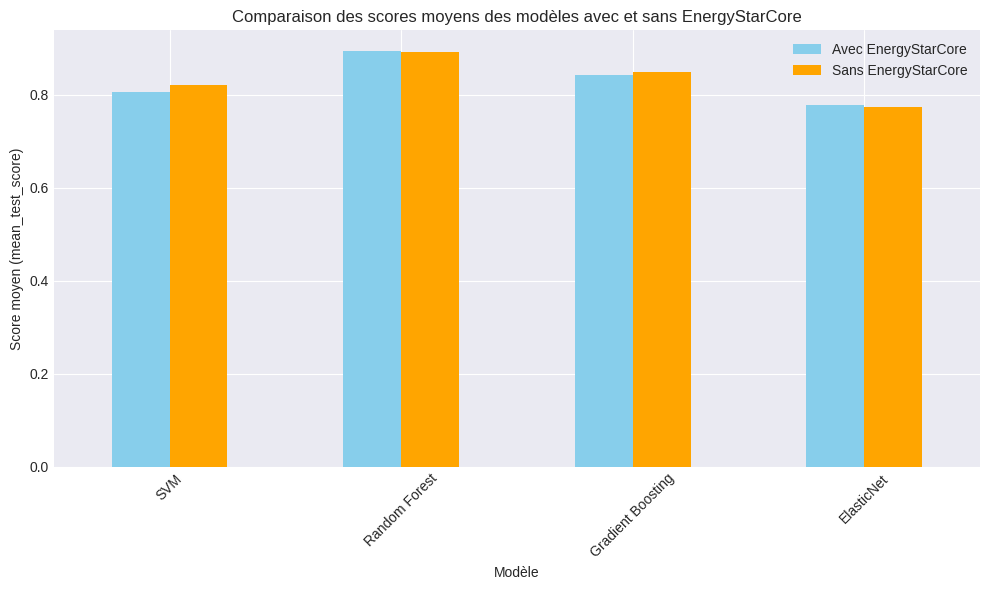

In [ ]:
# Configurer le style de la visualisation
plt.style.use('seaborn-darkgrid')

# Taille de la figure
plt.figure(figsize=(10, 6))

# Comparer les scores
ax = df_comparaison.plot(
    x="Model",
    y=["Avec Energy", "Sans Energy"],
    kind="bar",
    color=["skyblue", "orange"],
    title="Comparaison des scores moyens des modèles avec et sans EnergyStarCore",
    figsize=(10, 6)
)

# Ajouter des labels et une légende
plt.xlabel("Modèle")
plt.ylabel("Score moyen (mean_test_score)")
plt.legend(["Avec EnergyStarCore", "Sans EnergyStarCore"])
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


In [ ]:
# Extraire le meilleur modèle
best_model = grid.best_estimator_

# Prétraiter les données
x_train_preprocessed = best_model.named_steps['preprocessor'].fit_transform(x_train_avec)
x_test_preprocessed = best_model.named_steps['preprocessor'].transform(x_test_avec)

# Récupérer les noms des caractéristiques après prétraitement
feature_names = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
num_features = x_train_avec[numeric_ener].columns
all_feature_names = np.concatenate([num_features, feature_names])

# Utiliser un échantillon résumé des données de fond pour SHAP
background = shap.sample(x_train_preprocessed, 100)

# Créer l'explainer SHAP
explainer = shap.KernelExplainer(best_model.named_steps['regressor'].predict, background)

# Calculer les valeurs SHAP
shap_values = explainer.shap_values(x_test_preprocessed, nsamples=100)

  0%|          | 0/197 [00:00<?, ?it/s]

In [ ]:
# Sélectionner une ligne spécifique à expliquer
shap.initjs()
row_to_show = 5
data_for_prediction = x_test_preprocessed[row_to_show].toarray() if hasattr(x_test_preprocessed[row_to_show], "toarray") else x_test_preprocessed[row_to_show]

In [ ]:
# Visualiser les valeurs SHAP pour la prédiction
shap.force_plot(explainer.expected_value, shap_values[row_to_show], data_for_prediction)

In [ ]:
# Créer un objet force_plot avec les noms de caractéristiques
#force_plot = shap.force_plot(explainer.expected_value, shap_values[row_to_show], data_for_prediction, feature_names=all_feature_names)

In [ ]:
# Sauvegarder et télécharger le fichier HTML
#shap.save_html("/content/shap_force_plot.html", force_plot)
#from google.colab import files
#files.download('/content/shap_force_plot.html')

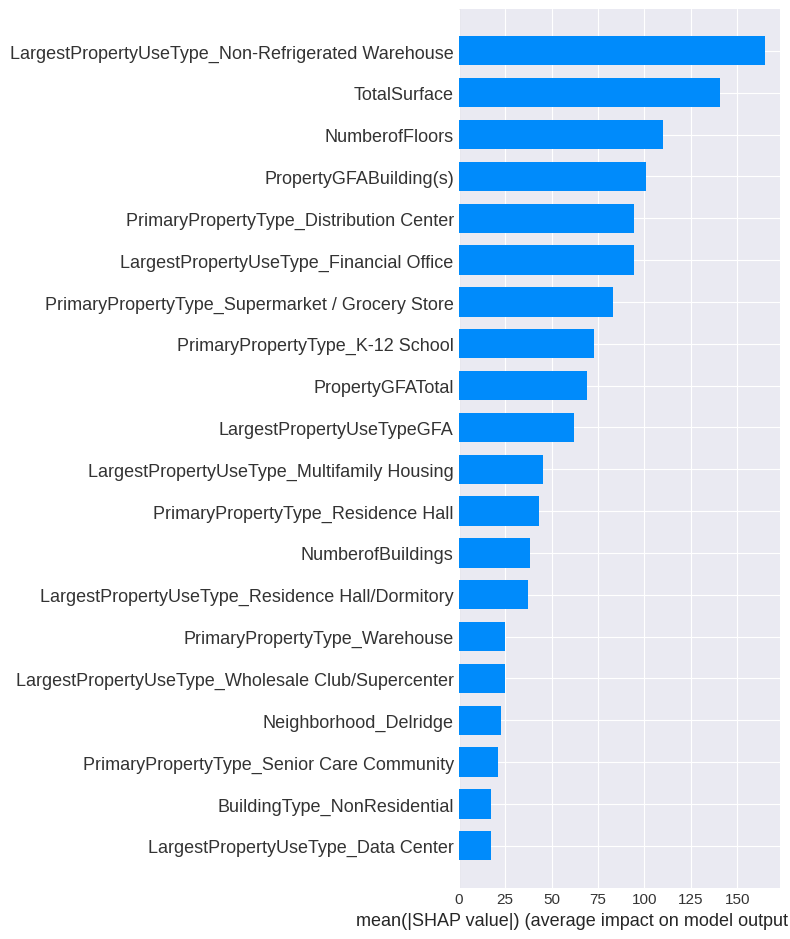

In [ ]:
shap.summary_plot(shap_values, x_test_preprocessed, plot_type="bar", feature_names=all_feature_names)

**Comparaison des modèles en fonction R² Score, MAE et MSE**

<ipython-input-61-90b1b59a4b4a>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis', ax=axes[0])
<ipython-input-61-90b1b59a4b4a>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-61-90b1b59a4b4a>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='plasma', ax=axes[1])
<ipython-input-61-90b1b59a4b4a>:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
<ipython-inp

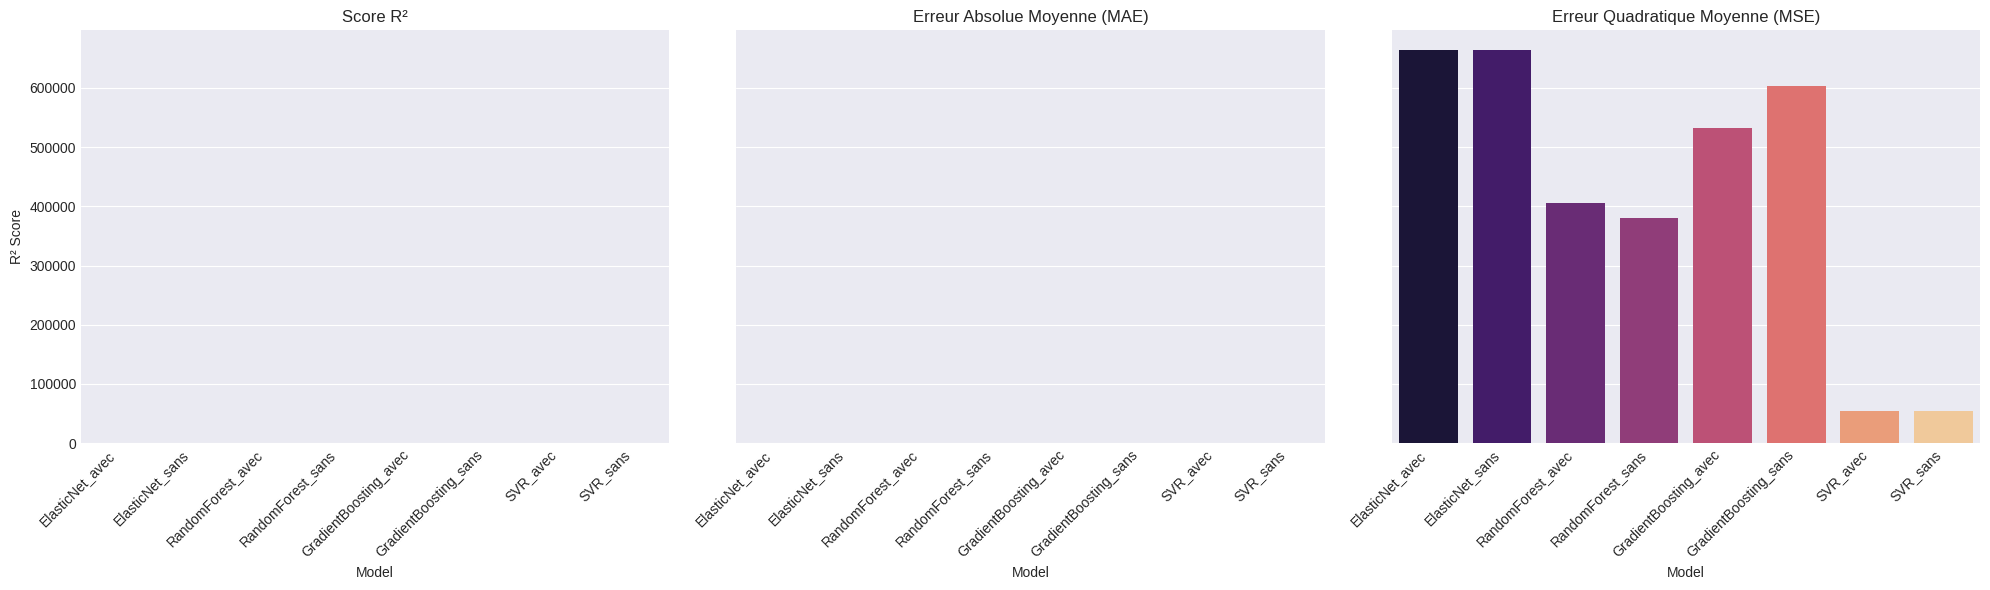

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), colonnes_numeriques),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colonnes_categorielles)
    ]
)

# Définir les paramètres pour GridSearchCV
parameters_elastic = {'regressor__alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1], 'regressor__l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
paramètres_forest = {'regressor__n_estimators': [300, 400], 'regressor__max_depth': [None, 20, 30], 'regressor__min_samples_split': [2, 3], 'regressor__min_samples_leaf': [1, 2]}
paramètres_boosting = {'regressor__n_estimators': [300, 400], 'regressor__learning_rate': [0.15, 0.2], 'regressor__max_depth': [4, 5], 'regressor__min_samples_split': [2, 3, 4]}
paramètres_svr = {'regressor__C': [1000, 10000, 15000, 20000], 'regressor__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5], 'regressor__kernel': ['linear', 'rbf']}

# Entraînement des modèles avec GridSearchCV
pipelines = {
    'ElasticNet_avec': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', ElasticNet())
    ]),
    'ElasticNet_sans': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', ElasticNet())
    ]),
    'RandomForest_avec': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]),
    'RandomForest_sans': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]),
    'GradientBoosting_avec': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]),
    'GradientBoosting_sans': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]),
    'SVR_avec': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ]),
    'SVR_sans': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ])
}

# Initialiser GridSearchCV pour chaque pipeline
grid_searches = {
    'ElasticNet_avec': GridSearchCV(pipelines['ElasticNet_avec'], parameters_elastic, n_jobs=-1, cv=3),
    'ElasticNet_sans': GridSearchCV(pipelines['ElasticNet_sans'], parameters_elastic, n_jobs=-1, cv=3),
    'RandomForest_avec': GridSearchCV(pipelines['RandomForest_avec'], paramètres_forest, n_jobs=-1, cv=3),
    'RandomForest_sans': GridSearchCV(pipelines['RandomForest_sans'], paramètres_forest, n_jobs=-1, cv=3),
    'GradientBoosting_avec': GridSearchCV(pipelines['GradientBoosting_avec'], paramètres_boosting, n_jobs=-1, cv=3),
    'GradientBoosting_sans': GridSearchCV(pipelines['GradientBoosting_sans'], paramètres_boosting, n_jobs=-1, cv=3),
    'SVR_avec': GridSearchCV(pipelines['SVR_avec'], paramètres_svr, n_jobs=-1, cv=3),
    'SVR_sans': GridSearchCV(pipelines['SVR_sans'], paramètres_svr, n_jobs=-1, cv=3)
}

# Entraîner les modèles
for name, grid in grid_searches.items():
    grid.fit(x_train_avec if 'avec' in name else x_train_sans, y_train_avec if 'avec' in name else y_train_sans)

# Initialiser une liste pour stocker les résultats
results = []

# Calculer les métriques de performance pour chaque modèle
for name, grid in grid_searches.items():
    # Meilleur modèle
    best_model = grid.best_estimator_

    # Prédictions sur l'ensemble de test
    x_test_data = x_test_avec if 'avec' in name else x_test_sans
    y_test_data = y_test_avec if 'avec' in name else y_test_sans
    y_pred = best_model.predict(x_test_data)

    # Calcul des métriques
    r2 = r2_score(y_test_data, y_pred)
    mae = mean_absolute_error(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)

    # Ajouter les résultats à la liste
    results.append({
        'Model': name,
        'R² Score': r2,
        'MAE': mae,
        'MSE': mse
    })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Visualisation des métriques
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# R² Score
sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis', ax=axes[0])
axes[0].set_title('Score R²')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# MAE
sns.barplot(x='Model', y='MAE', data=results_df, palette='plasma', ax=axes[1])
axes[1].set_title('Erreur Absolue Moyenne (MAE)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# MSE
sns.barplot(x='Model', y='MSE', data=results_df, palette='magma', ax=axes[2])
axes[2].set_title('Erreur Quadratique Moyenne (MSE)')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


*Comparaison du Score R² entre les Ensembles d'Entraînement et de Test*

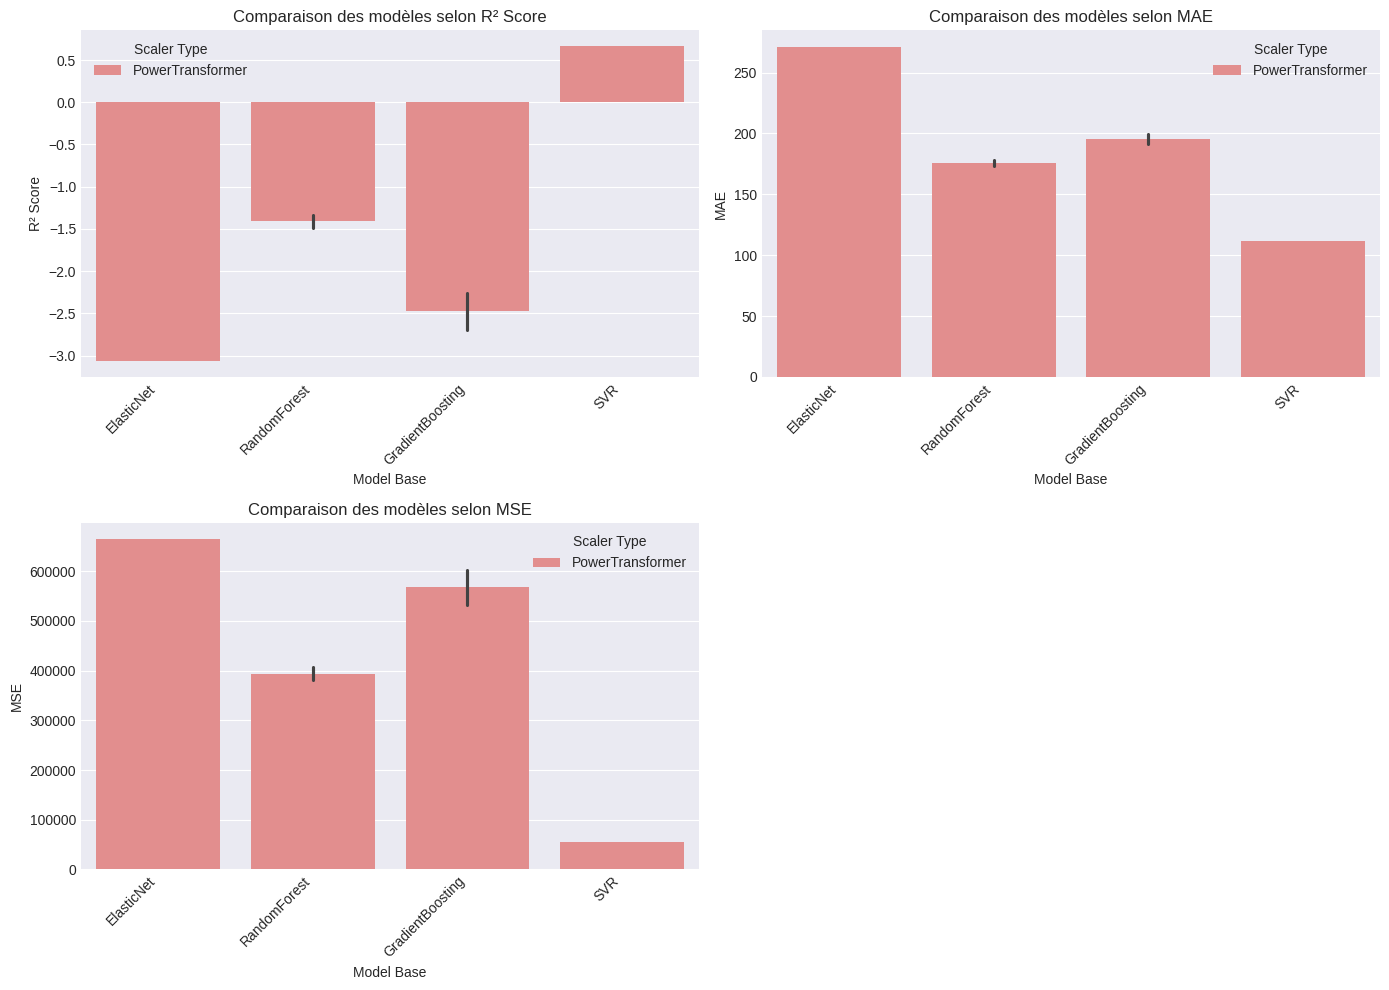

In [ ]:
# Convertir les résultats en DataFrame si ce n'est pas déjà fait
results_df = pd.DataFrame(results)

# Ajouter une colonne pour différencier les modèles 'StandardScaler' et 'PowerTransformer'
results_df['Scaler Type'] = results_df['Model'].apply(lambda x: 'StandardScaler' if 'StandardScaler' in x else 'PowerTransformer')

# Extraire le nom du modèle sans le type de scaler
results_df['Model Base'] = results_df['Model'].apply(lambda x: x.split('_')[0])

# Définir une palette de couleurs
palette = {"StandardScaler": "skyblue", "PowerTransformer": "lightcoral"}

# Définir la taille de la figure
plt.figure(figsize=(14, 10))

# Boucle pour créer un sous-graphe pour chaque métrique
metrics = ['R² Score', 'MAE', 'MSE']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model Base', y=metric, hue='Scaler Type', data=results_df, palette=palette)
    plt.title(f'Comparaison des modèles selon {metric}')
    plt.xticks(rotation=45, ha='right')

# Ajuster la mise en page pour que les graphiques ne se chevauchent pas
plt.tight_layout()

# Afficher le graphique
plt.show()

In [ ]:
# Récupérer les prédictions pour l'ensemble d'entraînement
y_train_pred = grid.predict(x_train_avec)

# Récupérer les prédictions pour l'ensemble de test
y_test_pred = grid.predict(x_test_avec)

# Calculer les métriques pour l'ensemble d'entraînement
train_r2 = r2_score(y_train_avec, y_train_pred)
train_mse = mean_squared_error(y_train_avec, y_train_pred)
train_mae = mean_absolute_error(y_train_avec, y_train_pred)

# Calculer les métriques pour l'ensemble de test
test_r2 = r2_score(y_test_avec, y_test_pred)
test_mse = mean_squared_error(y_test_avec, y_test_pred)
test_mae = mean_absolute_error(y_test_avec, y_test_pred)

# Afficher les résultats
print(f"Performance sur l'ensemble d'entraînement:")
print(f"R2 : {train_r2}")
print(f"MSE : {train_mse}")
print(f"MAE : {train_mae}\n")

print(f"Performance sur l'ensemble de test:")
print(f"R2 : {test_r2}")
print(f"MSE : {test_mse}")
print(f"MAE : {test_mae}")

Performance sur l'ensemble d'entraînement:
R2 : 0.9876598918694051
MSE : 6741.826525055666
MAE : 22.3158138622528

Performance sur l'ensemble de test:
R2 : 0.6649598938251028
MSE : 54693.71918223129
MAE : 111.65150870141106


*Comparaison des Valeurs Réelles et Prédites*

<ipython-input-65-e35f95c8a496>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ensemble', y='R²', data=r2_df, palette='viridis')


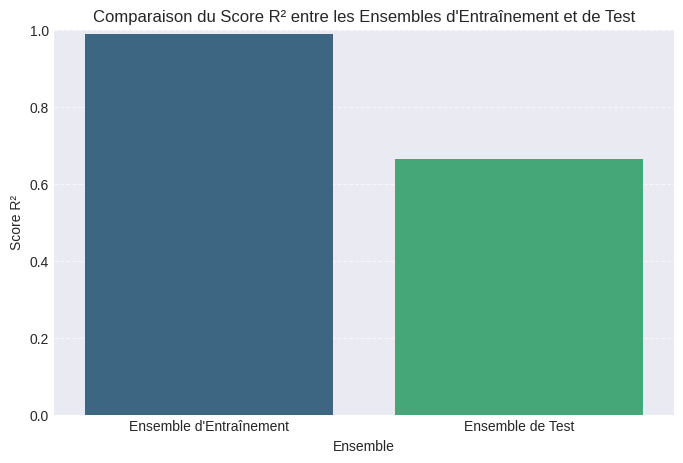

In [ ]:
# Création d'un DataFrame pour le score R²
r2_data = {
    'Ensemble': ['Ensemble d\'Entraînement', 'Ensemble de Test'],
    'R²': [train_r2, test_r2]
}

r2_df = pd.DataFrame(r2_data)

# Création du graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(x='Ensemble', y='R²', data=r2_df, palette='viridis')

# Personnalisation du graphique
plt.title('Comparaison du Score R² entre les Ensembles d\'Entraînement et de Test')
plt.xlabel('Ensemble')
plt.ylabel('Score R²')
plt.ylim(0, 1)  # R² est généralement entre 0 et 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()